In [ ]:
'''
Seth Tyler
ISD503 Project
Fall 2021
'''

In [45]:
# Version Summary:
# V3 uses dataset v3, which has been updated to include categories for 
# generation and stages (v2 only used category for mass)

In [46]:
import bnlearn as bn
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from time import sleep

In [47]:
# General settings used for plotting
plt.rcParams['figure.figsize'] = (10,8)
michigan_blue = '#00274C'
powder_blue = '#E7F3F6'

In [48]:
# Import Bayes Net dedicated data from aggregated dataset

datafile = '../08-Datasets/Aggregated_SLR_Dataset_v4.xlsx'
sheet = 'ForNetica'

df = pd.read_excel(datafile, sheet_name=sheet,engine="openpyxl") #if using .xlsx
# df = pd.read_excel(datafile, sheet_name=sheet, engine='xlrd') #if using .xls
print(df.tail(5))

      Mass_Cat  Veh_Generation_Category  Number_of_Stages_Category  \
1150         1                        1                          1   
1151         1                        2                          3   
1152         2                        2                          2   
1153         2                        3                          1   
1154         2                        2                          2   

      Failure_Bool  
1150             0  
1151             0  
1152             0  
1153             0  
1154             0  


In [49]:
# Structure learning - All potential models
# Borrowed from https://github.com/erdogant/bnlearn/blob/master/README.md
# bdeu_model = bn.structure_learning.fit(df, scoretype='bdeu') #original

model_unspec  = bn.structure_learning.fit(df)
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc',  scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc',  scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc',  scoretype='bdeu')
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex',  scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex',  scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex',  scoretype='bdeu')
model_cl      = bn.structure_learning.fit(df, methodtype='cl',  root_node='Number_of_Stages_Category')
model_tan     = bn.structure_learning.fit(df, methodtype='tan', root_node='Veh_Generation_Category', class_node='Failure_Bool')


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/6.0 [00:00<?, ?it/s]

[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/6.0 [00:00<?, ?it/s]

In [50]:
def plot_model(model, fig_title = False):
    DAG = bn.plot(model, interactive=True, params_interactive = {'directed':True, 'height':'400px', 'width':'70%', 'notebook':False, 'heading':fig_title, 'layout':None, 'font_color': False, 'bgcolor':'#ffffff'})
    return DAG

In [51]:

# model_unspec_DAG = bn.bnlearn.plot(model_unspec, interactive=False, title='print the damn title')#, params_static = {'width':15, 'height':8, 'font_size':14, 'font_family':'times new roman', 'alpha':0.8, 'node_shape':'o', 'facecolor':'white', 'font_color':'#000000'})
delay_time = 0.1


model_unspec_DAG = plot_model(model_unspec,fig_title='Model Unspecified')
sleep(delay_time)

model_hc_bic_DAG = plot_model(model_hc_bic, fig_title='hc_bic')
sleep(delay_time)

model_hc_k2_DAG = plot_model(model_hc_k2, fig_title='hc_k2')
sleep(delay_time)

model_hc_bdeu_DAG = plot_model(model_hc_bdeu, fig_title='hc_bdeu')
sleep(delay_time)

model_ex_bic_DAG = plot_model(model_ex_bic, fig_title='ex_bic')
sleep(delay_time)

model_ex_k2_DAG = plot_model(model_ex_k2, fig_title='ex_k2')
sleep(delay_time)

model_ex_bdeu_DAG = plot_model(model_ex_bdeu,fig_title='ex_bdeu')
sleep(delay_time)

model_cl_DAG = plot_model(model_cl, fig_title='cl')
sleep(delay_time)

model_tan_DAG = plot_model(model_tan, fig_title='tan')
sleep(delay_time)



[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


In [52]:
mle_model = bn.parameter_learning.fit(model_unspec, df, methodtype='mle')

[bnlearn] >Parameter learning> Computing parameters using [mle]
[bnlearn] >Conversion of adjmat to BayesianModel.


In [53]:
mle_model

{'model': <pgmpy.models.BayesianModel.BayesianModel at 0x20edd2ef730>,
 'adjmat': target                     Mass_Cat  Veh_Generation_Category  \
 source                                                         
 Mass_Cat                      False                    False   
 Veh_Generation_Category        True                    False   
 Number_of_Stages_Category     False                    False   
 Failure_Bool                  False                    False   
 
 target                     Number_of_Stages_Category  Failure_Bool  
 source                                                              
 Mass_Cat                                        True         False  
 Veh_Generation_Category                         True          True  
 Number_of_Stages_Category                      False         False  
 Failure_Bool                                   False         False  ,
 'config': {'verbose': 3, 'method': 'mle'}}

In [54]:
bayes_model = bn.parameter_learning.fit(model_unspec, df, methodtype='bayes')


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of Mass_Cat:
+-------------------------+----------------------------+----------------------------+----------------------------+
| Veh_Generation_Category | Veh_Generation_Category(1) | Veh_Generation_Category(2) | Veh_Generation_Category(3) |
+-------------------------+----------------------------+----------------------------+----------------------------+
| Mass_Cat(1)             | 0.3944020356234097         | 0.3960268317853457         | 0.29034359224881945        |
+-------------------------+----------------------------+----------------------------+----------------------------+
| Mass_Cat(2)             | 0.42384587422755365        | 0.47497420020639836        | 0.5204364110079792         |
+-------------------------+----------------------------+----------------------------+----------------------------+
| Mass_Cat(3)             | 0.18175209014903673    

In [55]:
print(df.columns)

Index(['Mass_Cat', 'Veh_Generation_Category', 'Number_of_Stages_Category',
       'Failure_Bool'],
      dtype='object')


In [56]:
evidence_set = {'Mass_Cat':1,'Veh_Generation_Category':3,'Number_of_Stages_Category':2}
variable_set = ['Failure_Bool']

In [57]:
prediction = bn.inference.fit(bayes_model,variables=variable_set,evidence=evidence_set)
# print(bn.inference.fit(bayes_model,variables=variable_set,evidence=evidence_set))
# bn.inference.fit(bayes_model,variables=variable_set,evidence=evidence_set)

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+----------------+----------+
|    |   Failure_Bool |        p |
+====+================+==========+
|  0 |              0 | 0.745481 |
+----+----------------+----------+
|  1 |              1 | 0.254519 |
+----+----------------+----------+


In [58]:
prediction.df['p'][1]

0.2545188080117245

In [59]:
# # To print the issues encountered
datafile = '../08-Datasets/Aggregated_SLR_Dataset_v4.xlsx'
sheet = 'ForNetica_stats'

# # Import data for evaluation
df_explore = pd.read_excel(datafile, sheet_name=sheet,engine="openpyxl") #if using .xlsx
# # df = pd.read_excel(datafile, sheet_name=sheet, engine='xlrd') #if using .xls
print(df_explore.tail(5))

    Count_Year  Count_Issues
18        2016            11
19        2017            17
20        2018            27
21        2019            22
22        2020            42


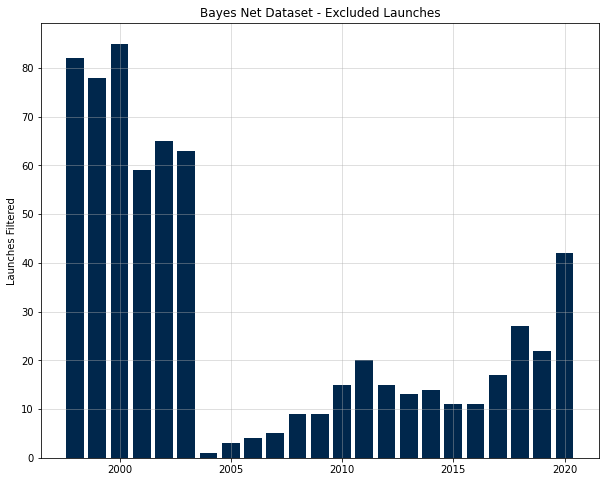

In [60]:
plt.bar(df_explore['Count_Year'], df_explore['Count_Issues'], color=michigan_blue)
plt.title('Bayes Net Dataset - Excluded Launches')
plt.grid(alpha=0.5)
plt.ylabel('Launches Filtered')
plt.savefig('bn_filtered_launches.png', bbox_inches='tight')

In [61]:
# Build Prediction Matrix for Plotting


In [62]:
# This is silly - this only compares the various structure learnings, not parameter learnings
# updated to compare parameter learning approaches (MLE vs Bayes) for the "best" DAG

#model_list = [model_unspec, model_hc_bic, model_ex_bdeu, model_hc_k2, model_hc_bdeu, model_ex_bic, model_ex_k2, model_cl]

# put model that i like best here:
model_list = []
mass_category_options = [1,2,3]
veh_gen_category_options = [1,2,3]
stages_category_options = [1,2,3]
solver_type = ['bayes','maximumlikelihood']

rslt_bayes_df = pd.DataFrame(columns=['Mass_Cat','Veh_Generation_Category','Number_of_Stages_Category','Probability_Fail'])
rslt_mle_df = pd.DataFrame(columns=['Mass_Cat','Veh_Generation_Category','Number_of_Stages_Category','Probability_Fail'])

for selected_model in model_list:
    for solver in solver_type:
        model = bn.parameter_learning.fit(selected_model, df, methodtype=solver)
        prediction_model = model
        for mass_category in mass_category_options:
            for veh_gen_category in veh_gen_category_options:
                for stage_category in stages_category_options:
                    evidence_set = {'Mass_Cat':mass_category,'Veh_Generation_Category':veh_gen_category,'Number_of_Stages_Category':stage_category}
                    variable_set = ['Failure_Bool']

                    prediction = bn.inference.fit(prediction_model,variables=variable_set,evidence=evidence_set)
                    print('model: ',selected_model['model'],'solver: ',solver,'mass ',mass_category,' gen ', veh_gen_category, ' stage ',stage_category, '==> ',prediction.df['p'][1])
                    prediction_value=prediction.df['p'][1]
                    if solver=='bayes': rslt_bayes_df = rslt_bayes_df.append({'Mass_Cat': mass_category,'Veh_Generation_Category':veh_gen_category,'Number_of_Stages_Category':stage_category,'Probability_Fail':prediction_value}, ignore_index=True)
                    if solver=='maximumlikelihood': rslt_mle_df = rslt_mle_df.append({'Mass_Cat': mass_category,'Veh_Generation_Category':veh_gen_category,'Number_of_Stages_Category':stage_category,'Probability_Fail':prediction_value}, ignore_index=True)


In [63]:
# plt.scatter(rslt_df['Mass_Cat'],rslt_df['Probability_Fail'], color=michigan_blue)
# plt.scatter(rslt_df['Veh_Generation_Category'],rslt_df['Probability_Fail'], color='red')

In [64]:
print(rslt_bayes_df, rslt_mle_df)
rslt_bayes_df.corr()
rslt_mle_df.corr()

Empty DataFrame
Columns: [Mass_Cat, Veh_Generation_Category, Number_of_Stages_Category, Probability_Fail]
Index: [] Empty DataFrame
Columns: [Mass_Cat, Veh_Generation_Category, Number_of_Stages_Category, Probability_Fail]
Index: []


""


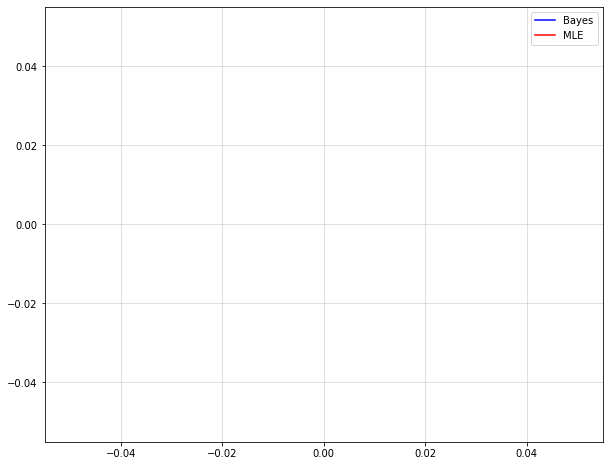

In [65]:
plt.plot(rslt_bayes_df['Probability_Fail'], color='blue', label='Bayes')
plt.plot(rslt_mle_df['Probability_Fail'], color='red', label='MLE')
plt.legend()
plt.grid(alpha=0.5)

In [66]:
# Making my own DAG
edges = [('Mass_Cat', 'Number_of_Stages_Category'),('Number_of_Stages_Category','Failure_Bool'),('Veh_Generation_Category','Failure_Bool')]

In [68]:
DAG_seth=bn.make_DAG(edges)

[bnlearn] >Bayesian DAG created.


In [75]:
bn.plot(DAG_seth, interactive=True, params_interactive = {'directed':True, 'height':'400px', 'width':'70%', 'notebook':False, 'heading':'Author Created', 'layout':None, 'font_color': False, 'bgcolor':'#ffffff'})

[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


{'pos': {'Mass_Cat': array([-0.53606885, -0.87252913]),
  'Number_of_Stages_Category': array([-0.96479966,  0.64285624]),
  'Failure_Bool': array([0.53518498, 1.        ]),
  'Veh_Generation_Category': array([ 0.96568352, -0.77032711])},
 'G': <networkx.classes.digraph.DiGraph at 0x20edd2431c0>,
 'node_properties': {'Mass_Cat': {'node_color': '#1f456e', 'node_size': 10},
  'Number_of_Stages_Category': {'node_color': '#1f456e', 'node_size': 10},
  'Failure_Bool': {'node_color': '#1f456e', 'node_size': 10},
  'Veh_Generation_Category': {'node_color': '#1f456e', 'node_size': 10}}}

In [71]:
bn.print_CPD(DAG_seth)

[bnlearn] >No CPDs to print. Tip: use bnlearn.plot(DAG) to make a plot.


In [72]:
DAG_seth_update = bn.parameter_learning.fit(DAG_seth, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Mass_Cat:
+-------------+----------+
| Mass_Cat(1) | 0.362104 |
+-------------+----------+
| Mass_Cat(2) | 0.474865 |
+-------------+----------+
| Mass_Cat(3) | 0.163032 |
+-------------+----------+
[bnlearn] >CPD of Number_of_Stages_Category:
+------------------------------+---------------------+---------------------+---------------------+
| Mass_Cat                     | Mass_Cat(1)         | Mass_Cat(2)         | Mass_Cat(3)         |
+------------------------------+---------------------+---------------------+---------------------+
| Number_of_Stages_Category(1) | 0.30770326071479426 | 0.4232356134636265  | 0.36748893105629343 |
+------------------------------+---------------------+---------------------+---------------------+
| Number_of_Stages_Category(2) | 0.41663106934358535 | 0.3646036916395223  | 0.31625553447185323 |
+------------------------------+---------------------+---------------------+--

In [78]:
q = bn.print_CPD(DAG_seth_update)

CPD of Mass_Cat:
+-------------+----------+
| Mass_Cat(1) | 0.362104 |
+-------------+----------+
| Mass_Cat(2) | 0.474865 |
+-------------+----------+
| Mass_Cat(3) | 0.163032 |
+-------------+----------+
CPD of Number_of_Stages_Category:
+------------------------------+---------------------+---------------------+---------------------+
| Mass_Cat                     | Mass_Cat(1)         | Mass_Cat(2)         | Mass_Cat(3)         |
+------------------------------+---------------------+---------------------+---------------------+
| Number_of_Stages_Category(1) | 0.30770326071479426 | 0.4232356134636265  | 0.36748893105629343 |
+------------------------------+---------------------+---------------------+---------------------+
| Number_of_Stages_Category(2) | 0.41663106934358535 | 0.3646036916395223  | 0.31625553447185323 |
+------------------------------+---------------------+---------------------+---------------------+
| Number_of_Stages_Category(3) | 0.2756656699416204  | 0.2121606948

In [84]:
DAG_seth_update

{'model': <pgmpy.models.BayesianModel.BayesianModel at 0x20edd7de6d0>,
 'adjmat': target                     Mass_Cat  Number_of_Stages_Category  Failure_Bool  \
 source                                                                         
 Mass_Cat                      False                       True         False   
 Number_of_Stages_Category     False                      False          True   
 Failure_Bool                  False                      False         False   
 Veh_Generation_Category       False                      False          True   
 
 target                     Veh_Generation_Category  
 source                                              
 Mass_Cat                                     False  
 Number_of_Stages_Category                    False  
 Failure_Bool                                 False  
 Veh_Generation_Category                      False  ,
 'config': {'verbose': 3, 'method': 'bayes'}}